# FEgrow: An Open-Source Molecular Builder and Free Energy Preparation Workflow

**Authors: Mateusz K Bieniek, Ben Cree, Rachael Pirie, Joshua T. Horton, Natalie J. Tatum, Daniel J. Cole**

## Overview

Here we introduce the ChemSpace class which:
 - automates protocols and takes care of CPU/cluster processing with Dask
 - stores data in a dataframe
 - employs scikit for active learning

In [1]:
import prody
from rdkit import Chem

import fegrow
from fegrow import RGroups, Linkers, ChemSpace

# initialise
rgroups = RGroups()
linkers = Linkers()

MolGridWidget(grid_id='m2')

MolGridWidget(grid_id='m1')

# Prepare the ligand template

The provided core structure `lig.pdb` has been extracted from a crystal structure of Mpro in complex with compound **4** from the Jorgensen study (PDB: 7L10), and a Cl atom has been removed to allow growth into the S3/S4 pocket. The template structure of the ligand is protonated with [Open Babel](http://openbabel.org/wiki/Main_Page):

In [2]:
!obabel sarscov2/lig.pdb -O sarscov2/coreh.sdf -p 7

1 molecule converted


Load the protonated ligand into FEgrow:

In [3]:
init_mol = Chem.SDMolSupplier('sarscov2/mini.sdf', removeHs=False)[0]

# get the FEgrow representation of the rdkit Mol
scaffold = fegrow.RMol(init_mol)

Show the 2D (with indices) representation of the core. This is used to select the desired growth vector.

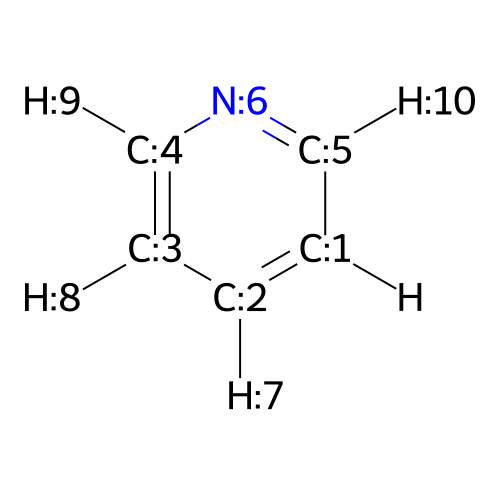

In [4]:
scaffold.rep2D(idx=True, size=(500, 500))

Using the 2D drawing, select an index for the growth vector. Note that it is currently only possible to grow from hydrogen atom positions. In this case, we are selecting the hydrogen atom labelled H:40 to enable growth into the S3/S4 pocket of Mpro.

In [5]:
# specify the connecting point
scaffold.GetAtomWithIdx(8).SetAtomicNum(0)

In [6]:
# create the chemical space
cs = ChemSpace()

Dask can be watched on http://192.168.178.20:8989/status


In [7]:
cs.add_scaffold(scaffold)

In [8]:
# initially it is empty
cs

,Smiles,score,h,Training,enamine_searched,enamine_id,2D


# Select RGroups for your template

R-groups can be selected interactively or programmaticaly.

We have provided a set of common R-groups (see `fegrow/data/rgroups/library`), which can be browsed and selected interactively below.

Molecules from the library can alternatively be selected by name, as demonstrated below.

Finally, user-defined R-groups may be provided as `.mol` files. *In this case, the hydrogen atom selected for attachment should be replaced by the element symbol R.* See the directory `manual_rgroups` for examples.

In [9]:
rgroups

<iframe class="mols2grid-iframe" frameborder="0" width="100%"
 
 
 allow="clipboard-write"
 
 
 sandbox="allow-scripts allow-same-origin allow-downloads allow-popups allow-modals"
 
 srcdoc="



<html lang="en">
 <head>
 <meta charset="UTF-8" />
 <meta http-equiv="X-UA-Compatible" content="IE=edge" />
 <meta name="viewport" content="width=device-width, initial-scale=1.0" />
 <title>Document!</title>



 <style>
 /**
 * General styling
 */
body {
 font-family: 'DejaVu', sans-serif;
}
h1,h2,h3,h4 {
 margin: 0 0 10px 0;
}
h1 {
 font-size: 26px;
}
h2 {
 font-size: 20px;
 font-weight: 400;
}
h3 {
	font-size: 16px;
}
p {
 margin: 0 0 10px 0;
}


/* Remove body margin inside iframe */
body.m2g-inside-iframe {
 margin: 0;
}

/* In-cell text */
#mols2grid .data:not(.data-img) {
 height: 16px;
 line-height: 16px;
}
/* Text truncation */
#mols2grid .data {
 /* Break text into multiple lines (default for static)... */
 word-wrap: normal;

 /* ...or truncate it (default for interactive). */
 overflow: hidden;
 white-space: nowrap;
 text-overflow: ellipsis;
}


/**
 * Popover
 * - - -
 * Note: this is a bootstrap variable which is not namespaced.
 * To avoid any contamination, we only style it when the
 * x-placement parameter is set.
 */
.popover[x-placement] {
 font-family: 'DejaVu', sans-serif;
 background: white;
 border: solid 1px rgba(0,0,0,.2);
 font-size: 12px;
 padding: 10px;
 border-radius: 5px;
 box-shadow: 0 0 20px rgba(0,0,0,.15);
 user-select: none;
}
.popover[x-placement] h3 {
 margin: 0;
}
.popover[x-placement] .arrow {
 width: 10px;
 height: 10px;
 background: #fff;
 border: solid 1px rgba(0,0,0,.2);
 box-sizing: border-box;
 position: absolute;
 transform-origin: 5px 5px;
 clip-path: polygon(0 0, 100% 0, 100% 100%);
}
.popover[x-placement='left'] .arrow {
 transform: rotate(45deg);
 top: 50%;
 right: -5px;
}
.popover[x-placement='right'] .arrow {
 transform: rotate(-135deg);
 top: 50%;
 left: -5px;
}
.popover[x-placement='top'] .arrow {
 transform: rotate(135deg);
 left: 50%;
 bottom: -5px;
}
.popover[x-placement='bottom'] .arrow {
 transform: rotate(-45deg);
 left: 50%;
 top: -5px;
}
 body {
 /* Colors */
 --m2g-black: rgba(0,0,0,.75);
 --m2g-black-soft: rgba(0,0,0,.35);
 --m2g-black-10: rgba(0,0,0,.1);
 --m2g-bg: #f6f6f6;
 --m2g-border: solid 1px rgba(0,0,0,0.2);
 --m2g-hl: #555; /* Highlight color */
 --m2g-hl-shadow: inset 0 0 0 1px var(--m2g-hl); /* Inset 1px shadow to make border thicker */
 --m2g-blue: #0f62fe;
 --m2g-blue-soft: rgba(15,98,254,.2);

 /* Icons */
 --m2g-icn-triangle: url('data:image/svg+xml;utf8,<svg width="20" fill="rgba(0,0,0,.75)" height="20" viewBox="0 0 20 20" xmlns="http://www.w3.org/2000/svg"><path d="M9.5713 13.285L6.2543 7.757C6.0543 7.424 6.2953 7 6.6823 7L13.3173 7C13.7053 7 13.9463 7.424 13.7453 7.757L10.4283 13.285C10.2343 13.609 9.7653 13.609 9.5713 13.285Z"/></svg>');
 --m2g-icn-triangle-white: url('data:image/svg+xml;utf8,<svg width="20" fill="white" height="20" viewBox="0 0 20 20" xmlns="http://www.w3.org/2000/svg"><path d="M9.5713 13.285L6.2543 7.757C6.0543 7.424 6.2953 7 6.6823 7L13.3173 7C13.7053 7 13.9463 7.424 13.7453 7.757L10.4283 13.285C10.2343 13.609 9.7653 13.609 9.5713 13.285Z"/></svg>');
 --m2g-icn-cb-white: url('data:image/svg+xml;utf8,<svg width="16" height="16" viewBox="0 0 16 16" fill="none" stroke="white" stroke-width="2.5" stroke-linecap="round" xmlns="http://www.w3.org/2000/svg"><path d="M4 7.65686L7 10.6569L12.6569 5.00001"/></svg>');
 
 /* Border radius */
 --m2g-br: 3px;
 --m2g-br-l: var(--m2g-br) 0 0 var(--m2g-br); /* Left-only */
 --m2g-br-r: 0 var(--m2g-br) var(--m2g-br) 0; /* Right-only */

 /* Text */
 --m2g-fs: 14px; /* UI font-size */
 --m2g-fs-cell: 12px; /* Cell font-size */

 /* Transition speeds */
 --m2g-trans: 150ms;

 /* Layout */
 --m2g-h: 40px; /* Form element height */
}

/* Styling */
#mols2grid {
 font-family: 'DejaVu', sans-serif;
 font-size: var(--m2g-fs);
}

/* Fixes */
#mols2grid *,
#mols2grid *::before,
#mols2grid *::after {
 box-sizing: b

In [10]:
# retrieve the interactively selected groups
interactive_rgroups = rgroups.get_selected()

# you can also directly access the built-in dataframe programmatically
R_group_ethanol = rgroups[rgroups.Name == '*CCO'].Mol.item()

# select the R-group using the index
R_group_cyclopropane = rgroups.Mol[69] 

# use SMILES
R_group_methanol = Chem.AddHs(Chem.MolFromSmiles('*CO'))

# add your R-groups from files
R_group_propanol = Chem.MolFromMolFile('manual_rgroups/propan-1-ol-r.mol', removeHs=False)

### Expand your chemical space by building on top off your scaffold. 

,Smiles,score,h,Training,enamine_searched,enamine_id,2D
0,[H]OC([H])([H])C([H])([H])c1c([H])nc([H])c([H]...,<NA>,8,False,False,<NA>,

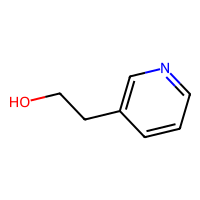

In [11]:
# Adding R-groups implies that the scaffold should be used. 
# The previously scaffold will be attached automatically. 

# or we can use the template merged with the linker
# in which case the attachement point is not needed (R* atom is used)
cs.add_rgroups(R_group_ethanol)
cs

In [12]:
linkers

In [13]:
# get linkers programmatically from the library
rcr_linker = linkers[linkers.Name == 'R1CR2'].Mol.item()
rocr_linker = linkers.Mol[6], # use the linker table index directly, e.g. index 6 is "R2COR1"

# pick linkers from the grid
grid_linkers = linkers.get_selected()

# use Smiles
rcor_linker = Chem.AddHs(Chem.MolFromSmiles('[*:0]CO[*:1]'))

# 

### Add linkers to build more structures

The R-Group lacks initial coordinates. Defaulting to Chem.rdDistGeom.EmbedMolecule.
[13:05:02] UFFTYPER: Unrecognized atom type: *_ (0)
[13:05:02] UFFTYPER: Unrecognized atom type: *_ (3)
The R-Group lacks initial coordinates. Defaulting to Chem.rdDistGeom.EmbedMolecule.
[13:05:02] UFFTYPER: Unrecognized atom type: *_ (0)


,Smiles,score,h,Training,enamine_searched,enamine_id,2D
0,[H]OC([H])([H])C([H])([H])c1c([H])nc([H])c([H]...,<NA>,8,False,False,NaN,
1,[H]OC([H])([H])OC([H])([H])c1c([H])nc([H])c([H...,<NA>,12,False,False,<NA>,
2,[H]c1nc([H])c(C([H])([H])OOC([H])([H])C([H])([...,<NA>,12,False,False,<NA>,

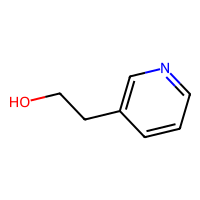
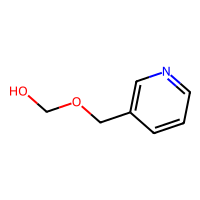
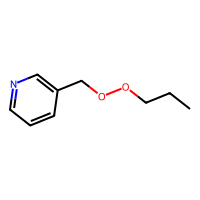

In [14]:
# Adding R-groups implies that the scaffold should be used. 
# The previously scaffold will be attached automatically. 

# join a linker with the rgroups
cs.add_rgroups(rcor_linker, [R_group_methanol, R_group_propanol])
cs

The R-group library can also be viewed as a 2D grid, or individual molecules can be selected for 3D view (note that the conformation of the R-group has not yet been optimised):

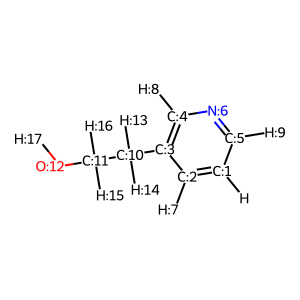

In [15]:
mol = cs[0]
mol.rep2D()

In [16]:
cs[0].rep3D()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Once the ligands have been generated, they can be assessed for various ADMET properties, including Lipinksi rule of 5 properties, the presence of unwanted substructures or problematic functional groups, and synthetic accessibility.

In [17]:
cs.toxicity()

,MW,HBA,HBD,LogP,Pass_Ro5,has_pains,has_unwanted_subs,has_prob_fgs,synthetic_accessibility,Smiles
0,123.155,2,1,0.616,True,False,False,False,7.522,[H]OC([H])([H])C([H])([H])c1c([H])nc([H])c([H]...
1,139.154,3,1,0.548,True,False,True,True,7.369,[H]OC([H])([H])OC([H])([H])c1c([H])nc([H])c([H...
2,167.208,3,0,1.940,True,False,True,True,7.715,[H]c1nc([H])c(C([H])([H])OOC([H])([H])C([H])([...


For each ligand, a specified number of conformers (`num_conf`) is generated by using the RDKit [ETKDG algorithm](https://doi.org/10.1021/acs.jcim.5b00654). Conformers that are too similar to an existing structure are discarded. Empirically, we have found that `num_conf=200` gives an exhaustive search, and `num_conf=50` gives a reasonable, fast search, in most cases.

If required, a third argument can be added `flexible=[0,1,...]`, which provides a list of additional atoms in the core that are allowed to be flexible. This is useful, for example, if growing from a methyl group and you would like the added R-group to freely rotate.

In [18]:
cs.generate_conformers(num_conf=50, 
                          minimum_conf_rms=0.5, 
                          # flexible=[3, 18, 20])
                        )

Generated 6 conformers. 
Generated 14 conformers. 
Generated 25 conformers. 


### Prepare the protein

The protein-ligand complex structure is downloaded, and [PDBFixer](https://github.com/openmm/pdbfixer) is used to protonate the protein, and perform other simple repair:

In [19]:
# get the protein-ligand complex structure
!wget -nc https://files.rcsb.org/download/7L10.pdb

# load the complex with the ligand
sys = prody.parsePDB('7L10.pdb')

# remove any unwanted molecules
rec = sys.select('not (nucleic or hetatm or water)')

# save the processed protein
prody.writePDB('rec.pdb', rec)

# fix the receptor file (missing residues, protonation, etc)
fegrow.fix_receptor("rec.pdb", "rec_final.pdb")

# load back into prody
rec_final = prody.parsePDB("rec_final.pdb")

File ‘7L10.pdb’ already there; not retrieving.



@> 2609 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 4638 atoms and 1 coordinate set(s) were parsed in 0.03s.


View enumerated conformers in complex with protein:

In [20]:
cs[0].rep3D(prody=rec_final)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Any conformers that clash with the protein (any atom-atom distance less than 1 Angstrom), are removed.

In [21]:
cs.remove_clashing_confs(rec_final)

Removed 3 conformers. 
Removed 5 conformers. 
Removed 13 conformers. 


In [22]:
cs[0].rep3D(prody=rec_final)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Optimise conformers in context of protein

The remaining conformers are optimised using hybrid machine learning / molecular mechanics (ML/MM), using the [ANI2x](https://doi.org/10.1021/acs.jctc.0c00121) neural nework potential for the ligand energetics (as long as it contains only the atoms H, C, N, O, F, S, Cl). Note that the Open Force Field [Parsley](https://doi.org/10.1021/acs.jctc.1c00571) force field is used for intermolecular interactions with the receptor.

`sigma_scale_factor`: is used to scale the Lennard-Jones radii of the atoms.

`relative_permittivity`: is used to scale the electrostatic interactions with the protein.

`water_model`: can be used to set the force field for any water molecules present in the binding site.

In [23]:
# opt_mol, energies
energies = cs.optimise_in_receptor(
    receptor_file="rec_final.pdb", 
    ligand_force_field="openff", 
    use_ani=True,
    sigma_scale_factor=0.8,
    relative_permittivity=4,
    water_model = None,
    platform_name = 'CPU', # or e.g. 'CUDA'
)

/home/dresio/software/mambaforge/envs/fegrow/lib/python3.10/site-packages/parmed/structure.py:1799: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  coords = np.array(value, dtype=np.float64, copy=False, subok=True)


using ani2x


/home/dresio/software/mambaforge/envs/fegrow/lib/python3.10/site-packages/torchani/__init__.py:55: UserWarning: Dependency not satisfied, torchani.ase will not be available
  warnings.warn("Dependency not satisfied, torchani.ase will not be available")


/home/dresio/software/mambaforge/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
failed to equip `nnpops` with error: No module named 'NNPOps'


Optimising conformer:   0%|                               | 0/3 [00:00<?, ?it/s][W BinaryOps.cpp:594] Warning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (function operator())
Optimising conformer: 100%|███████████████████████| 3/3 [00:04<00:00,  1.56s/it]


using ani2x
/home/dresio/software/mambaforge/envs/fegrow/lib/python3.10/site-packages/torchani/resources/
failed to equip `nnpops` with error: No module named 'NNPOps'


Optimising conformer:   0%|                               | 0/9 [00:00<?, ?it/s]

using ani2x
/home/dresio/software/mambaforge/envs/fegrow/lib/python3.10/site-packages/torchani/resources/


Optimising conformer:  56%|████████████▊          | 5/9 [00:08<00:05,  1.28s/it]

failed to equip `nnpops` with error: No module named 'NNPOps'


Optimising conformer: 100%|███████████████████████| 9/9 [00:12<00:00,  1.36s/it]

Optimising conformer: 100%|█████████████████████| 12/12 [00:18<00:00,  1.51s/it]


Any of the rmols that have no available conformers (due to unresolvable steric clashes with the protein) can be discarded using the `.discard_missing()` function. This function also returns a list of the indices that were removed, which can be helpful when carrying out data analysis.

In [24]:
missing_ids = cs.discard_missing()

Optionally, display the final optimised conformers. Note that, unlike classical force fields, ANI allows bond breaking. You may occasionally see ligands with distorted structures and very long bonds, but in our experience these are rarely amongst the low energy structures and can be ignored.

Conformers are now sorted by energy, only retaining those within 5 kcal/mol of the lowest energy structure:

In [25]:
final_energies = cs.sort_conformers(energy_range=5)

RMol index 0
RMol index 1
RMol index 2


In [26]:
cs[0].rep3D()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Save all of the lowest energy conformers to files and print the sorted energies in kcal/mol (shifted so that the lowest energy conformer is zero).

In [27]:
cs.to_sdf("optimised_molecules.sdf")
cs[0].to_file("best_conformers0.pdb") 

In [28]:
print(final_energies)

               Energy
ID  Conformer        
NaN 0           0.000
    1           2.913
    2           3.997
    0           0.000
    1           1.142
    2           2.378
    3           3.416
    4           4.408
    5           4.454
    0           0.000
    1           0.005
    2           0.409
    3           0.881
    4           2.357
    5           2.621
    6           2.621
    7           2.633
    8           2.782
    9           2.984


The conformers are scored using the [Gnina](https://github.com/gnina/gnina) molecular docking program and convolutional neural network scoring function. *[Note that this step is not supported on macOS].* If unavailable, the Gnina executable is downloaded during the first time it is used. The CNNscores may also be converted to predicted Kd (nM) (see column "Kd").

In [29]:
affinities = cs.gnina(receptor_file="rec_final.pdb") 
affinities

CNNaffinity                  Kd
ID Conformer                                 
0  0                3.123   753008.7105475883
   1                3.159   692946.9698425558
   2                3.046   898938.5395006385
1  0                2.951  1120701.6207310983
   1                3.274   532353.3606082619
   2                2.980   1048141.700960581
   3                2.971  1069079.4954043448
   4                2.937    1156271.97603475
   5                2.996  1008718.5327348622
2  0                3.213   612590.1367547697
   1                3.190    645059.833284831
   2                3.217   606708.3889913089
   3                2.980  1047176.7712129756
   4                3.253    559062.033683023
   5                3.367   429516.6463368885
   6                3.334   463382.8966008246
   7                3.386  410733.38086880127
   8                3.238     577989.56798585
   9                3.288  515252.37228403264

Predicted binding affinities may be further refined using the structures output by `FEgrow`, using your favourite free energy calculation engine. See our paper for an example using [SOMD](https://github.com/michellab/Sire) to calculate the relative binding free energies of 13 Mpro inhibitors.

In [30]:
# display units
affinities.Kd

ID  Conformer
0   0             753008.7105475883
    1             692946.9698425558
    2             898938.5395006385
1   0            1120701.6207310983
    1             532353.3606082619
    2             1048141.700960581
    3            1069079.4954043448
    4              1156271.97603475
    5            1008718.5327348622
2   0             612590.1367547697
    1              645059.833284831
    2             606708.3889913089
    3            1047176.7712129756
    4              559062.033683023
    5             429516.6463368885
    6             463382.8966008246
    7            410733.38086880127
    8               577989.56798585
    9            515252.37228403264
Name: Kd, dtype: pint[nanomolar]